In [1]:
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
#from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt
%pylab inline

C:\Users\KONYAYEV.MAKSIM\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


In [2]:
#Загрузите данные и внимательно изучите их. Сколько разных значений принимает признак religion?

#О каждой из них мы знаем:
#сколько детей она родила (признак ceb)
#возраст (age)
#длительность получения образования (educ)
#религиозная принадлежность (religion)
#идеальное, по её мнению, количество детей в семье (idlnchld)
#была ли она когда-нибудь замужем (evermarr)
#возраст первого замужества (agefm)
#длительность получения образования мужем (heduc)
#знает ли она о методах контрацепции (knowmeth)
#использует ли она методы контрацепции (usemeth)
#живёт ли она в городе (urban)
#есть ли у неё электричество, радио, телевизор и велосипед (electric, radio, tv, bicycle)

#answer is 4

In [3]:
raw = pd.read_csv("botswana.tsv", sep="\t", index_col=False) 
raw.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


C:\Users\KONYAYEV.MAKSIM\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


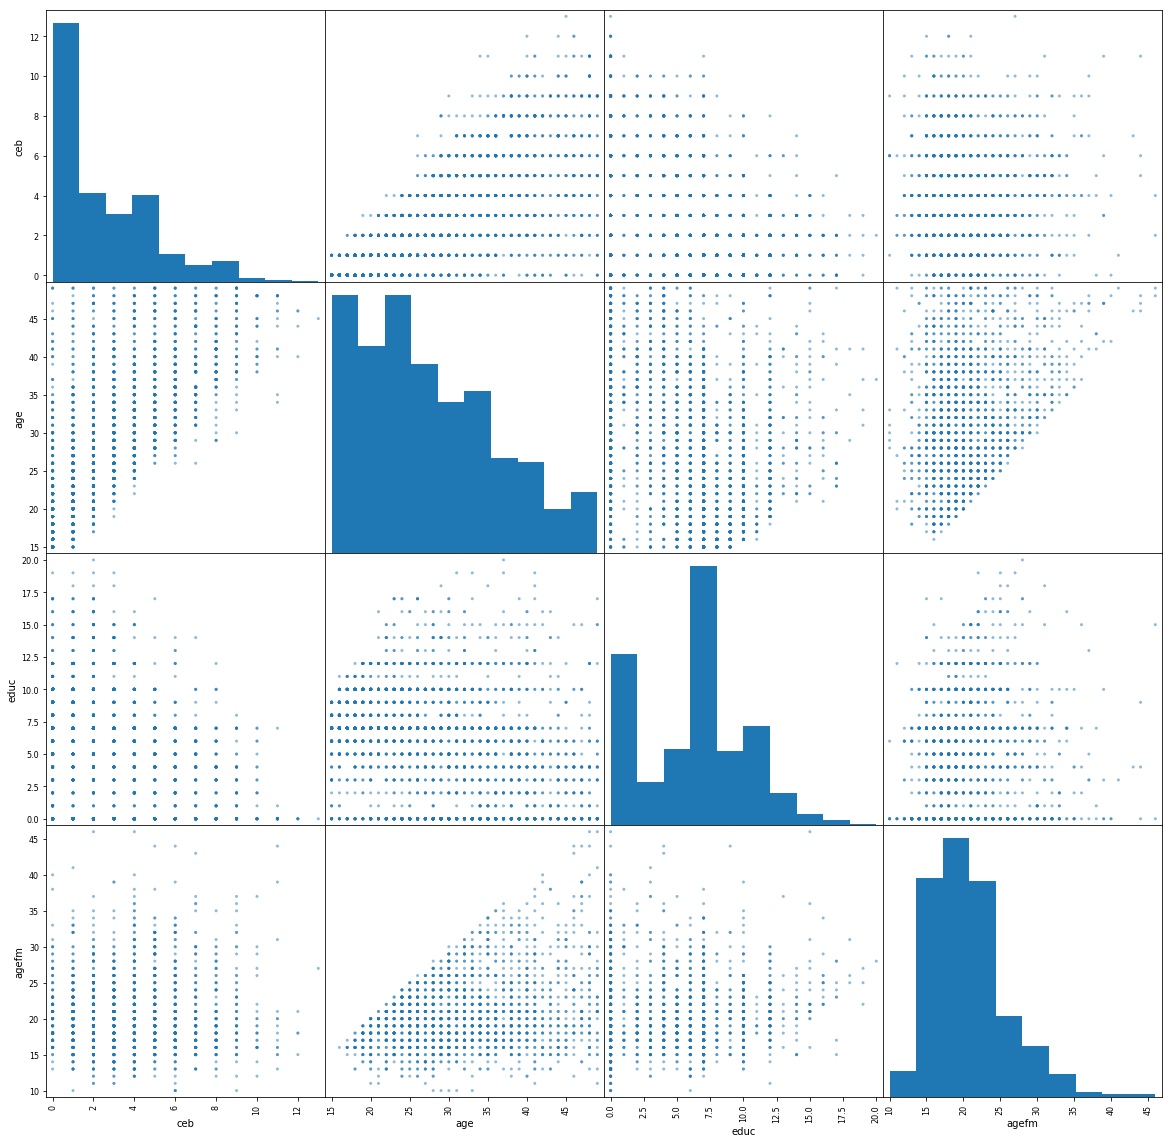

In [4]:
pd.tools.plotting.scatter_matrix(raw[['ceb', 'age', 'educ', 'agefm']], alpha=0.5, figsize=(20, 20), diagonal='hist')
pylab.show()

In [5]:
print raw.religion.value_counts()
raw.describe()

spirit        1841
other         1080
protestant     993
catholic       447
Name: religion, dtype: int64


,ceb,age,educ,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
count,4361.000000,4361.000000,4361.000000,4241.000000,4354.000000,4290.000000,4361.000000,2079.000000,1956.000000,4361.000000,4358.000000,4359.000000,4359.000000,4358.000000
mean,2.441642,27.405182,5.855996,4.615892,0.963252,0.577622,0.476726,20.686388,5.144683,0.516625,0.140202,0.701766,0.092911,0.275815
std,2.406861,8.685233,3.927075,2.219303,0.188164,0.493996,0.499515,5.002383,4.803028,0.499781,0.347236,0.457535,0.290341,0.446975
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,3.000000,3.000000,1.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,26.000000,7.000000,4.000000,1.000000,1.000000,0.000000,20.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,33.000000,8.000000,6.000000,1.000000,1.000000,1.000000,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,13.000000,49.000000,20.000000,20.000000,1.000000,1.000000,1.000000,46.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


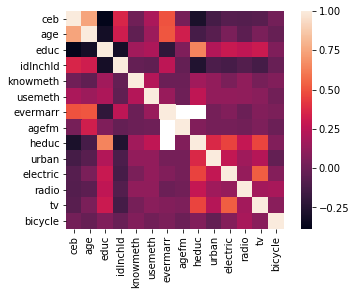

In [6]:
import seaborn
seaborn.heatmap(raw.corr(), square=True)
#seaborn.heatmap(raw.corr(), annot = True, square=True, fmt = '.1f', vmin = 0.89)

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 15 columns):
ceb         4361 non-null int64
age         4361 non-null int64
educ        4361 non-null int64
religion    4361 non-null object
idlnchld    4241 non-null float64
knowmeth    4354 non-null float64
usemeth     4290 non-null float64
evermarr    4361 non-null int64
agefm       2079 non-null float64
heduc       1956 non-null float64
urban       4361 non-null int64
electric    4358 non-null float64
radio       4359 non-null float64
tv          4359 non-null float64
bicycle     4358 non-null float64
dtypes: float64(9), int64(5), object(1)
memory usage: 511.1+ KB


In [8]:
#выводит количество пустых значений
raw.isnull().sum()

ceb            0
age            0
educ           0
religion       0
idlnchld     120
knowmeth       7
usemeth       71
evermarr       0
agefm       2282
heduc       2405
urban          0
electric       3
radio          2
tv             2
bicycle        3
dtype: int64

In [9]:
#Во многих признаках есть пропущенные значения. Сколько объектов из 4361 останется, если выбросить все, содержащие пропуски?
data_no_nulls=raw.dropna(axis=0, how='any')
print (data_no_nulls.shape)
#data_no_nulls.head()
#answer is 1834

(1834, 15)


In [10]:
#Сколько осталось пропущенных значений в признаке heduc?
data_step1=raw
data_step1['nevermarr'] = data_step1['agefm'].fillna('').apply(lambda x : 1 if x == '' else 0)
data_step1 = data_step1.drop(['evermarr'], axis = 1)
data_step1['agefm'] = data_step1['agefm'].fillna('').apply(lambda x : 0 if x == '' else x)
data_step1.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0.0,NaN,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,NaN,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0


In [11]:
#жуткий ремаппинг and slowly!
for row in range(data_step1.shape[0]):
    #print row
    if data_step1['nevermarr'].loc[row]==1:
        data_step1['heduc'].loc[row]=-1
data_step1.head()

C:\Users\KONYAYEV.MAKSIM\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0


In [12]:
data_step1.isnull().sum()
#answer is 123

ceb            0
age            0
educ           0
religion       0
idlnchld     120
knowmeth       7
usemeth       71
agefm          0
heduc        123
urban          0
electric       3
radio          2
tv             2
bicycle        3
nevermarr      0
dtype: int64

In [13]:
#Избавимся от оставшихся пропусков
data_step2=data_step1
#idlnchld_noans
data_step2['idlnchld'] = data_step2['idlnchld'].fillna('').apply(lambda x : -1 if x == '' else x)
data_step2['idlnchld_noans'] = data_step2['idlnchld'].apply(lambda x : 1 if x == -1 else 0)
#heduc_noans
data_step2['heduc'] = data_step2['heduc'].fillna('').apply(lambda x : -2 if x == '' else x)
data_step2['heduc_noans'] = data_step2['heduc'].apply(lambda x : 1 if x == -2 else 0)
#usemeth_noans
data_step2['usemeth'] = data_step2['usemeth'].fillna('').apply(lambda x : -1 if x == '' else x)
data_step2['usemeth_noans'] = data_step2['usemeth'].apply(lambda x : 1 if x == -1 else 0)

data_step2=data_step2.dropna(axis=0, how='any')
print (data_step2.shape, 'multiply=', data_step2.shape[0]*data_step2.shape[1])
#answer is 78264

data_step2.isnull().sum()

((4348, 18), 'multiply=', 78264)


ceb               0
age               0
educ              0
religion          0
idlnchld          0
knowmeth          0
usemeth           0
agefm             0
heduc             0
urban             0
electric          0
radio             0
tv                0
bicycle           0
nevermarr         0
idlnchld_noans    0
heduc_noans       0
usemeth_noans     0
dtype: int64

In [14]:
data_step2.to_csv("foreing_data.csv")

In [147]:
#Постройте регрессию количества детей ceb на все имеющиеся признаки методом smf.ols, как в разобранном до этого примере. 
#Какой получился коэффициент детерминации R2? Округлите до трёх знаков после десятичной точки.

model = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth +'\
                            'usemeth + agefm + heduc + urban + electric + radio + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', data=data_step2)
fitted = model.fit()
print fitted.summary()
#answer is 0.644

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:12:54   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [ ]:
#Обратите внимание, что для признака religion в модели автоматически создалось несколько бинарных фиктивных переменных. 
#Сколько их?
#answer is 3

C:\Users\mike\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  This is separate from the ipykernel package so we can avoid doing imports until


Breusch-Pagan test: p=0.000000


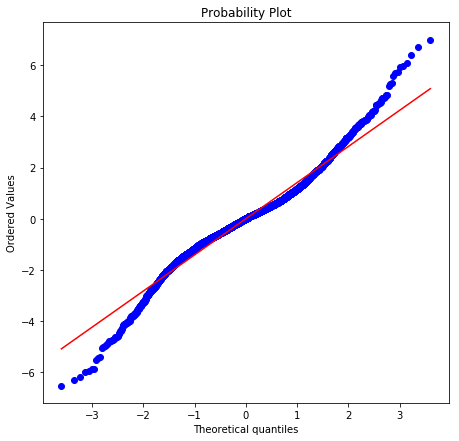

In [154]:
#Проверьте критерием Бройша-Пагана гомоскедастичность ошибки в построенной модели. Выполняется ли она?

print 'Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1]

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
pylab.show()

#answer is getero!

In [158]:
#some non-sense step
m_hc1 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth +'\
                            'usemeth + agefm + heduc + urban + electric + radio + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', data=data_step2)
fitted = m_hc1.fit(cov_type='HC1')
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     345.0
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:25:38   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [159]:
#Удалите из модели незначимые признаки religion, radio и tv. Проверьте гомоскедастичность ошибки, 
#при необходимости сделайте поправку Уайта.

#Не произошло ли значимого ухудшения модели после удаления этой группы признаков? 
#Проверьте с помощью критерия Фишера. Чему равен его достигаемый уровень значимости? Округлите до четырёх 
#цифр после десятичной точки.

#Если достигаемый уровень значимости получился маленький, верните все удалённые признаки; 
#если он достаточно велик, оставьте модель без религии, тв и радио.

m_hc1_cuted = smf.ols('ceb ~ age + educ + idlnchld + knowmeth +'\
                            'usemeth + agefm + heduc + urban + electric + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', data=data_step2)
fitted = m_hc1_cuted.fit(cov_type='HC1')
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:25:45   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [160]:
#Посмотрим, не стала ли модель от удаления трёх признаков значимо хуже, с помощью критерия Фишера:
print "F=%f, p=%f, k1=%f" % m_hc1.fit().compare_f_test(m_hc1_cuted.fit())
#answer is 0.4672!

F=0.919236, p=0.467231, k1=5.000000


In [164]:
#Признак usemeth_noans значим по критерию Стьюдента, то есть, при его удалении модель значимо ухудшится. 
#Но вообще-то отдельно его удалять нельзя: из-за того, что мы перекодировали пропуски в usemeth 
#произвольно выбранным значением cusemeth=−1, удалять usemeth_noans и usemeth можно только вместе.

#Удалите из текущей модели usemeth_noans и usemeth. Проверьте критерием Фишера гипотезу о том, что качество модели не ухудшилось.
#Введите номер первой значащей цифры в достигаемом уровне значимости (например, если вы получили 5.5×10−8, нужно ввести 8).

#Если достигаемый уровень значимости получился маленький, верните удалённые признаки; 
#если он достаточно велик, оставьте модель без usemeth и usemeth_noans.

m_hc1_cuted_meth = smf.ols('ceb ~ age + educ + idlnchld + knowmeth +'\
                            'agefm + heduc + urban + electric + bicycle + nevermarr + idlnchld_noans + heduc_noans', data=data_step2)
fitted = m_hc1_cuted_meth.fit(cov_type='HC1')
print fitted.summary()

#Посмотрим, не стала ли модель от удаления признаков значимо хуже, с помощью критерия Фишера:
F, p, k1=  m_hc1_cuted.fit().compare_f_test(m_hc1_cuted_meth.fit())
print (F, p, k1)
#answer is 40

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     396.4
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:38:23   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1931      0.262     -4.

In [165]:
#Посмотрите на доверительные интервалы для коэффициентов итоговой модели (не забудьте использовать поправку Уайта,
#если есть гетероскедастичность ошибки) и выберите правильные выводы.
m_hc1_cuted = smf.ols('ceb ~ age + educ + idlnchld + knowmeth +'\
                            'usemeth + agefm + heduc + urban + electric + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', data=data_step2)
fitted = m_hc1_cuted.fit(cov_type='HC1')
print fitted.summary()


                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:40:04   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [ ]:
#final answers are: (0.83)
#
#точно ДА С увеличением возраста женщины на 1 год среднее количество детей возрастает на 0.17 (p<0.001, 95% доверительный интервал — [0.16, 0.18])
#У женщин, не знающих, какое количество детей идеально, в среднем на 0.66 ребёнка больше (p=0.002, 95% доверительный интервал — [0.2, 1.1])
#точно ДА У женщин, никогда не выходивших замуж, при прочих равных в среднем на 2.3 ребёнка меньше (p<0.001, 95% доверительный интервал для разницы между средними — [-2.6, -1.9])
#точно да - формула странная про 0.58
#точно нет - про объяснение моделью 63%

#попытка - если выбрать все, кроме 63% - то будет 67% в тесте